In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

In [2]:
data =pd.read_csv(r'budjet.csv')
data=data.sort_values(['date_time'],ascending=True)
data

,date_time,category,amount
0,2022-07-06 05:57:10 +0000,Restuarant,5.50
1,2022-07-06 05:57:27 +0000,Market,2.00
2,2022-07-06 05:58:12 +0000,Coffe,30.10
3,2022-07-06 05:58:25 +0000,Market,17.33
4,2022-07-06 05:59:00 +0000,Restuarant,5.50
...,...,...,...
1482,2023-05-24 07:42:46 +0000,Phone,5.00
1483,2023-05-24 10:02:04 +0000,Business lunch,6.00
1484,2023-05-24 16:55:40 +0000,Coffe,24.00
1485,2023-05-24 19:11:54 +0000,Transport,5.00


In [3]:
data['date_time']=pd.to_datetime(data['date_time'])
data['hours']=data['date_time'].dt.hour
data['Weekday'] = data['date_time'].dt.weekday
data['Weekday']=data['Weekday']+1
data['Year'] = data['date_time'].dt.year
data['Day_of_Year'] = data['date_time'].dt.dayofyear
data['Month'] = data['date_time'].dt.month
data

,date_time,category,amount,hours,Weekday,Year,Day_of_Year,Month
0,2022-07-06 05:57:10+00:00,Restuarant,5.50,5,3,2022,187,7
1,2022-07-06 05:57:27+00:00,Market,2.00,5,3,2022,187,7
2,2022-07-06 05:58:12+00:00,Coffe,30.10,5,3,2022,187,7
3,2022-07-06 05:58:25+00:00,Market,17.33,5,3,2022,187,7
4,2022-07-06 05:59:00+00:00,Restuarant,5.50,5,3,2022,187,7
...,...,...,...,...,...,...,...,...
1482,2023-05-24 07:42:46+00:00,Phone,5.00,7,3,2023,144,5
1483,2023-05-24 10:02:04+00:00,Business lunch,6.00,10,3,2023,144,5
1484,2023-05-24 16:55:40+00:00,Coffe,24.00,16,3,2023,144,5
1485,2023-05-24 19:11:54+00:00,Transport,5.00,19,3,2023,144,5


In [27]:
pd.DataFrame(data['category'].value_counts())

,category
Coffe,475
Market,382
Restuarant,193
Business lunch,103
Transport,84
Taxi,64
Phone,41
Learning,25
Health,23
Clothing,21


In [4]:
print(data.isna().sum())
print(data.duplicated().sum())

date_time      0
category       0
amount         0
hours          0
Weekday        0
Year           0
Day_of_Year    0
Month          0
dtype: int64
0


In [10]:
pd.DataFrame(data.groupby(['category'])['amount'].sum()).sort_values(['amount'],ascending=False).head()

,amount
category,
Coffe,3967.85
Restuarant,3687.29
Market,2191.15
Clothing,1715.50
Communal,1676.50


In [29]:
pd.DataFrame(data.groupby(['Year'])['amount'].sum()).sort_values(['amount'],ascending=False)

,amount
Year,
2023,10555.29
2022,10131.84


In [22]:
pd.DataFrame(data.groupby(['Month'])['amount'].sum()).sort_values(['amount'],ascending=False)

,amount
Month,
7,2861.38
5,2352.77
3,2274.61
4,2224.88
1,2162.19
10,2001.12
12,1605.53
2,1540.84
9,1338.48


In [28]:
pd.DataFrame(data.groupby(['Weekday'])['amount'].sum()).sort_values(['amount'],ascending=False)  ## sum

,amount
Weekday,
4,3841.17
6,3440.16
5,2973.84
1,2893.14
3,2755.44
2,2434.16
7,2349.22


<AxesSubplot:>

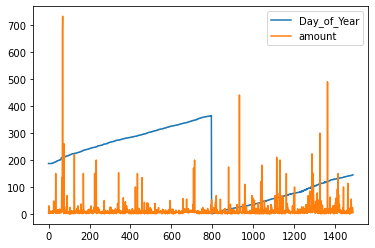

In [11]:
data[['Day_of_Year','amount']].plot()   ## operational count

<AxesSubplot:xlabel='Weekday', ylabel='count'>

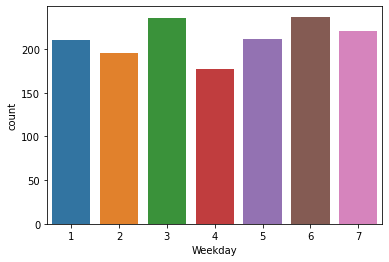

In [7]:
sns.countplot(data['Weekday'])   ## operational count

<AxesSubplot:xlabel='Month', ylabel='count'>

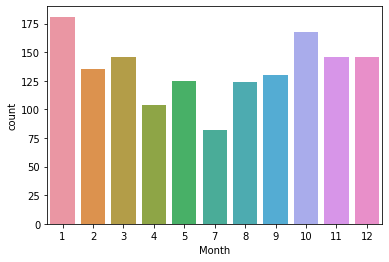

In [8]:
sns.countplot(data['Month'])  ## operational count

<AxesSubplot:xlabel='hours', ylabel='count'>

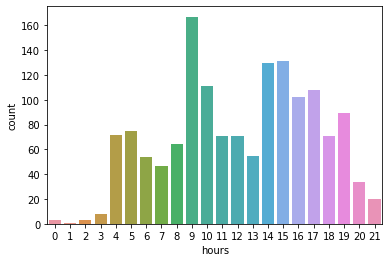

In [12]:
sns.countplot(data['hours'])  ## operational count